In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


# import pyspark as ps    # for the pyspark suite
# from pyspark.sql.types import StructType, StructField
# from pyspark.sql.types import IntegerType, StringType, FloatType, DateType, TimestampType
# import pyspark.sql.functions as F


# The following cells are where i make the different iterations of clean data sets that will be tested

first final_anime, which was the largest of all the datasets because it kept a lot of unused features. it had mystatus <= 3, and it removed all users that had stated they had watched less than one episode of the anime for the review. 

second, final_anime_2. This was similar to the previous but had less features. It also removed the 3's in my_status, all usernames that occured less than 6 times, and all anime_id's that occured less than 6 times

In [4]:
# make final_anime, 
# scoresdf = scoresdf.drop('Unnamed: 0', axis = 1)
# anime = anime.drop(['title', 'title_english', 'title_japanese',
#        'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
#        'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
#        'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
#        'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
#        'genre', 'opening_theme', 'ending_theme'], axis = 1)

# scoresdf = scoresdf[['username', 'anime_id', 'my_status', 'my_score', 'my_watched_episodes']]
# userlist = pd.read_csv('UserList.csv')

# scoresdf = scoresdf[(scoresdf['my_status'] == 1) | (scoresdf['my_status'] == 2) | (scoresdf['my_status'] == 3)]

# scoresdf = scoresdf.merge(userlist, on = 'username')
# scoresdf.to_csv('final_anime.csv')


In [2]:
# make anime_final_2
scoresdf = pd.read_csv('animelists_cleaned.csv')
# scoresdf = scoresdf[['username', 'anime_id', 'my_status', 'my_score', 'my_watched_episodes']]
# userlist = pd.read_csv('UserList.csv')

# scoresdf = scoresdf[(scoresdf['my_status'] == 1) | (scoresdf['my_status'] == 2) | (scoresdf['my_status'] == 3)]

# scoresdf = scoresdf.merge(userlist, on = 'username')
# scoresdf = scoresdf[['anime_id','username', 'my_score', 'user_id', 'stats_mean_score', 'my_watched_episodes', 'my_status']]
# scoresdf = scoresdf[scoresdf['my_watched_episodes']>3]
# scoresdf = scoresdf[scoresdf['my_status'] < 3]
# scoresdf= scoresdf.groupby('username').filter(lambda x : len(x)>5)
# scoresdf= scoresdf.groupby('anime_id').filter(lambda x : len(x)>5)

scoresdf
# scoresdf.to_csv('final_anime_2.csv')

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31284025,Yokonightcore,15611,48,2014-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:33:03,NaN
31284026,Yokonightcore,27815,22,0000-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:32:05,NaN
31284027,wargod,5945,39,0000-00-00,0000-00-00,8,2,0.0,0,2010-03-29 04:24:12,NaN
31284028,JMc_SetoKai_LoVe,1316,52,0000-00-00,0000-00-00,9,2,NaN,0,2009-12-23 05:45:14,NaN


In [8]:
# # make anime_final_3
# scoresdf = pd.read_csv('animelists_cleaned.csv')
# scoresdf = scoresdf[['username', 'anime_id', 'my_status', 'my_score', 'my_watched_episodes']]
# userlist = pd.read_csv('UserList.csv')

# scoresdf = scoresdf[(scoresdf['my_status'] == 1) | (scoresdf['my_status'] == 2) | (scoresdf['my_status'] == 3 | (scoresdf['my_status'] == 4))]

# scoresdf = scoresdf.merge(userlist, on = 'username')
scoresdf = scoresdf[['anime_id','username', 'my_score', 'user_id', 'stats_mean_score', 'my_watched_episodes', 'my_status']]
scoresdf = scoresdf[scoresdf['my_watched_episodes']>3]
scoresdf = scoresdf[scoresdf['my_status'] < 3]
scoresdf= scoresdf.groupby('username').filter(lambda x : len(x)>7)
scoresdf= scoresdf.groupby('anime_id').filter(lambda x : len(x)>7)


# scoresdf.value_counts()

In [10]:
scoresdf.to_csv('anime_final_3.csv')

In [5]:
scoresdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31284030 entries, 0 to 31284029
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   username             object 
 1   anime_id             int64  
 2   my_watched_episodes  int64  
 3   my_start_date        object 
 4   my_finish_date       object 
 5   my_score             int64  
 6   my_status            int64  
 7   my_rewatching        float64
 8   my_rewatching_ep     int64  
 9   my_last_updated      object 
 10  my_tags              object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.6+ GB


In [ ]:
# Things i need:
# histogram showing counts of ratings by anime and counts of ratings by user ( how many times has each yse)
# scoresdf.username.dropna(inplace = True)
fig, ax = plt.subplots(figsize = (20,10))

plt.hist(scoresdf.username, bins = 500)

(array([ 99442.,  79319., 104745.,  78723.,  85777.,  87953.,  92114.,
         91890.,  98272.,  92611.,  98497.,  88079.,  99270.,  88756.,
         90650.,  98285.,  93545., 100208.,  95026.,  88663.,  94403.,
         98108.,  88637.,  93665.,  93405.,  96042.,  89210.,  88931.,
         92288.,  90621., 100863., 101835.,  98285.,  91847.,  88560.,
         93608.,  95516.,  90105.,  84392.,  80395.,  97103.,  94788.,
         95611.,  77533.,  98776.,  89064.,  94078.,  97720.,  91122.,
         94515., 102956.,  98330.,  87436.,  88539.,  89865.,  93639.,
         91486.,  89786.,  93430.,  92379.,  90177.,  87809.,  86934.,
         86720.,  99136.,  93653.,  92522.,  86587.,  90640.,  90081.,
         99427.,  90776.,  88487.,  86543.,  90752.,  91856.,  89671.,
         99025.,  94647.,  90838.,  92375.,  88248.,  86631.,  85994.,
         89425.,  97042., 100878.,  96740.,  93046.,  86560.,  84458.,
         87473.,  94260.,  88428.,  85806.,  94669.,  88808.,  82168.,
      

Text(0.5, 1.0, 'Histogram Showing the Count of Anime Reviews')

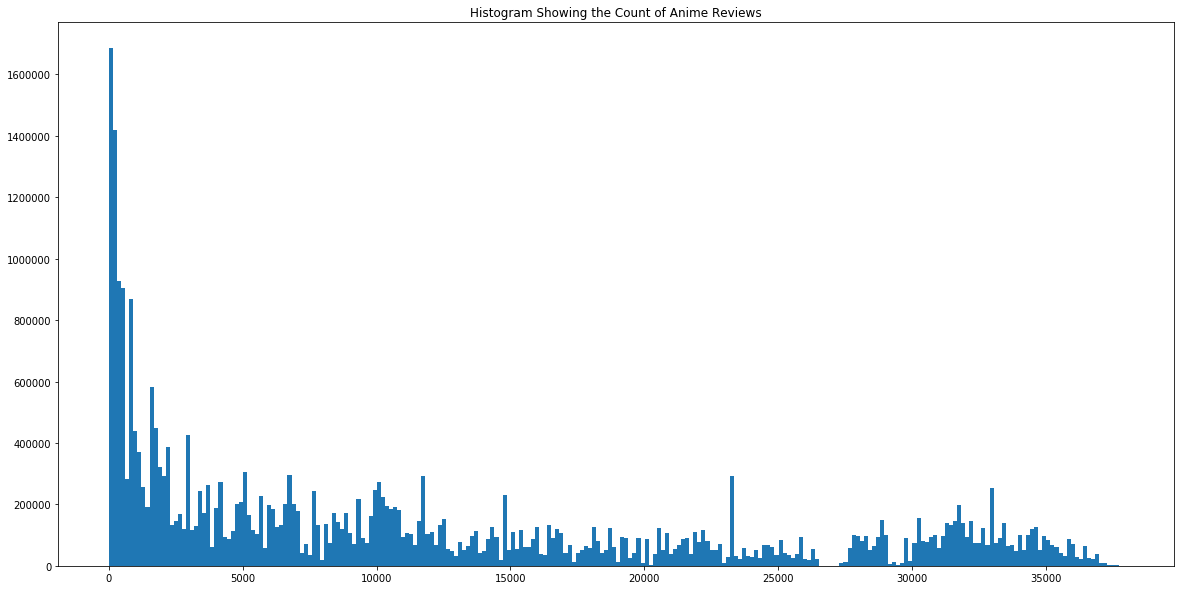

In [8]:
scoresdf.anime_id.dropna(inplace = True)
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(scoresdf.anime_id, bins = 250)
ax.set_title('Histogram Showing the Count of Anime Reviews')

# scoresdf

# Original Scores dataframe eda
date range = 2006-09-27 to 2018-05-22

count of reviews range by user = Exxorn (6536) to many with only 1 review

average score by user before removing a ton of zeros = 4.653545913136742

count of users = 108675

count of reviews range by anime = animeid =  1535, count = 80759, min is one for three 37494, 37493, 36818 

average score for anime before removing a ton of zeros  = 6.142481696366902

count of anime = 14478


There are significantly more 0 reviews than any other, with them comprising 12111905 of the original 31284030


In [6]:
# get the range of the scores
scoresdf = scoresdf[scoresdf['my_last_updated']> '1970-01-01 00:00:00']
scoresdf.sort_values(by = 'my_last_updated')

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
5300,Xinil,396,4,2004-01-11,0000-00-00,0,4,0.0,0,2006-09-27 06:12:23,NaN
8549214,Aokaado,50,9,2005-01-21,0000-00-00,6,4,0.0,0,2006-09-27 08:57:19,NaN
4771721,Condoriano,985,1,0000-00-00,0000-00-00,8,2,0.0,0,2006-09-27 09:09:16,NaN
4771722,Condoriano,986,1,0000-00-00,0000-00-00,7,2,0.0,0,2006-09-27 09:09:44,NaN
8549018,Aokaado,210,161,2004-06-07,2006-09-27,9,2,0.0,0,2006-09-27 19:59:25,"comedy, action, episodic, school, martial arts"
...,...,...,...,...,...,...,...,...,...,...,...
17290693,Zubinsenpai,36864,7,0000-00-00,0000-00-00,0,1,0.0,0,2018-05-22 07:22:45,NaN
17290736,Zubinsenpai,36001,7,0000-00-00,0000-00-00,0,1,0.0,0,2018-05-22 07:22:46,NaN
17290444,Zubinsenpai,35849,18,2018-02-10,0000-00-00,0,1,0.0,0,2018-05-22 07:23:07,NaN
17290682,Zubinsenpai,36296,7,0000-00-00,0000-00-00,0,1,0.0,0,2018-05-22 07:23:27,NaN


In [7]:
scoresdf.username.value_counts()

Exxorn          6536
uemmega         6367
JakCooper2      5923
DeadlyKizuna    5912
KanaenuYume     5234
                ... 
DanZ10             1
cham               1
empew2             1
LadyMiaka          1
SonicUndead        1
Name: username, Length: 108675, dtype: int64

In [39]:
# scoresdf.my_score.mean() = 4.652314775302287
scoresdf.my_score.value_counts()

0     12111905
8      4834595
7      4234726
9      3443674
10     2507404
6      2128502
5      1085660
4       480871
3       223202
2       130314
1       103177
Name: my_score, dtype: int64

In [31]:
# anime = pd.read_csv('AnimeList.csv')
anime

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,26089,Gutchonpa Omoshiro Hanashi,NaN,グッチョンパおもしろ話,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,5,Finished Airing,False,"Nov 5, 1987 to Nov 4, 1988","{'from': '1987-11-05', 'to': '1988-11-04'}",8 min. per ep.,G - All Ages,5.50,6,10337.0,13598,76,0,NaN,Fall 1987,Unknown,"{'Other': [{'mal_id': 26087, 'type': 'anime', ...",NaN,NaN,NaN,Kids,[],[]
14474,21525,Geba Geba Shou Time!,NaN,ゲバゲバ笑タイム!,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,Finished Airing,False,"Mar 21, 1986","{'from': '1986-03-21', 'to': '1986-03-21'}",25 min.,G - All Ages,4.60,5,10236.0,13284,90,0,NaN,NaN,NaN,[],Studio 

In [12]:
# anime = anime[['anime_id', 'score']]
# anime_id_merger = scoresdf.merge(anime, on = 'anime_id')


3.3782924891025905

In [6]:
scoresdf.merge
# score.average()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31284025,Yokonightcore,15611,48,2014-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:33:03,NaN
31284026,Yokonightcore,27815,22,0000-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:32:05,NaN
31284027,wargod,5945,39,0000-00-00,0000-00-00,8,2,0.0,0,2010-03-29 04:24:12,NaN
31284028,JMc_SetoKai_LoVe,1316,52,0000-00-00,0000-00-00,9,2,NaN,0,2009-12-23 05:45:14,NaN


In [8]:
scoresdf.my_score.mean()

4.652314775302287

In [38]:
userprofile_2255153 = scoresdf[scoresdf['user_id'] == 2255153]
userprofile_2255153.to_csv('test_user_profile.csv')

In [21]:
# most watched anime = scoresdf[scoresdf['anime_id']==1535]
# scoresdf[scoresdf['anime_id']==1575]
# scoresdf[scoresdf['anime_id']==226]
# scoresdf[scoresdf['anime_id']==5114]
# scoresdf[scoresdf['anime_id']==4224]
scoresdf.username.value_counts()

Exxorn           6536
uemmega          6367
JakCooper2       5923
DeadlyKizuna     5912
KanaenuYume      5234
                 ... 
aris77              1
blackwing29         1
IdiotIvan           1
NecroSeraphim       1
prabashiloveu       1
Name: username, Length: 108709, dtype: int64

(array([1.02004e+05, 1.35820e+04, 4.38110e+04, ..., 0.00000e+00,
        1.10000e+01, 9.00000e+00]),
 array([1.00000000e+00, 6.68311338e+00, 1.23662268e+01, ...,
        3.78846338e+04, 3.78903169e+04, 3.78960000e+04]),
 <a list of 6668 Patch objects>)

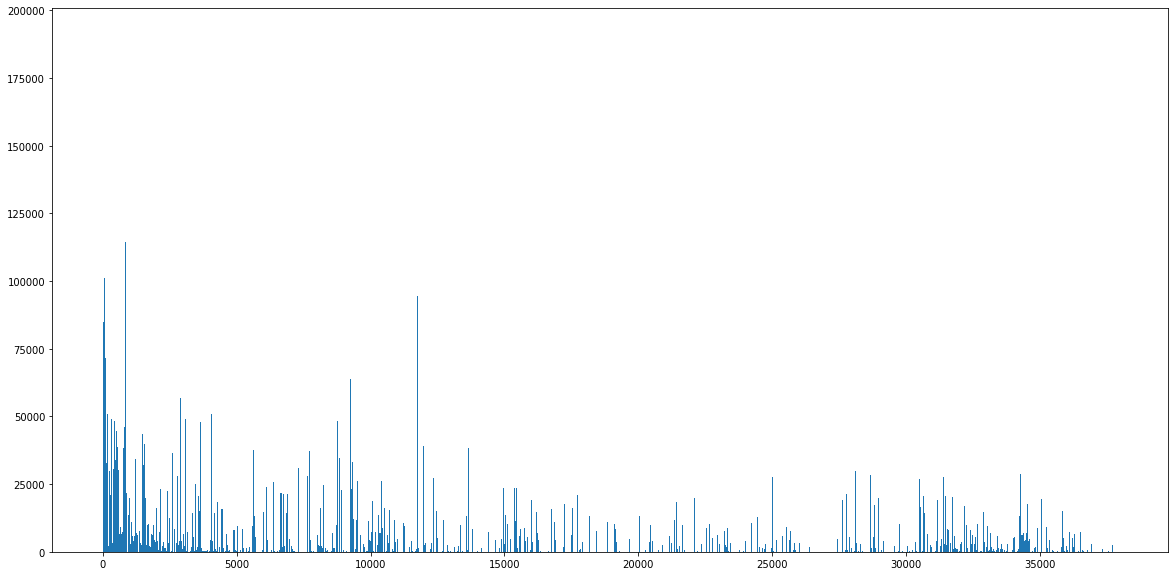

In [20]:

fig, ax = plt.subplots(figsize = (20,10))
ax.hist(scoresdf.anime_id, bins = 6668)
# ax.set_xlim(0,2000)

In [25]:
x = scoresdf.username.dropna()
fig, ax = plt.subplots(figsize = (20,10))
ax.hist(x, bins = 1500)
# ax.set_xlim(0,1500)

(array([30145., 35835., 33462., ...,   372.,   381.,   348.]),
 array([0.00000000e+00, 7.24720000e+01, 1.44944000e+02, ...,
        1.08563056e+05, 1.08635528e+05, 1.08708000e+05]),
 <a list of 1500 Patch objects>)

Error in callback <function flush_figures at 0x1148e0290> (for post_execute):


KeyboardInterrupt: 

Text(0.5, 1.0, 'Counts of each score given by a User')

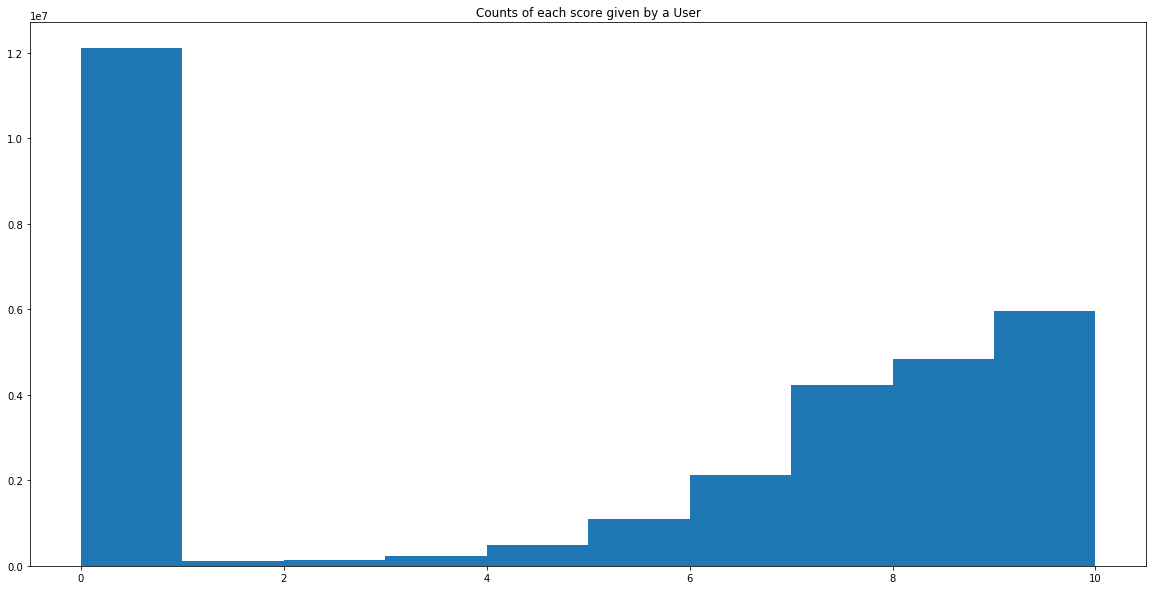

In [36]:
# len(scoresdf.username.unique()) =108710
# len(scoresdf.anime_id.unique()) =  666
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(scoresdf.my_score)
ax.set_title('Counts of each score given by a User')

Text(0.5, 1.0, "histogram of the anime's average ratings")

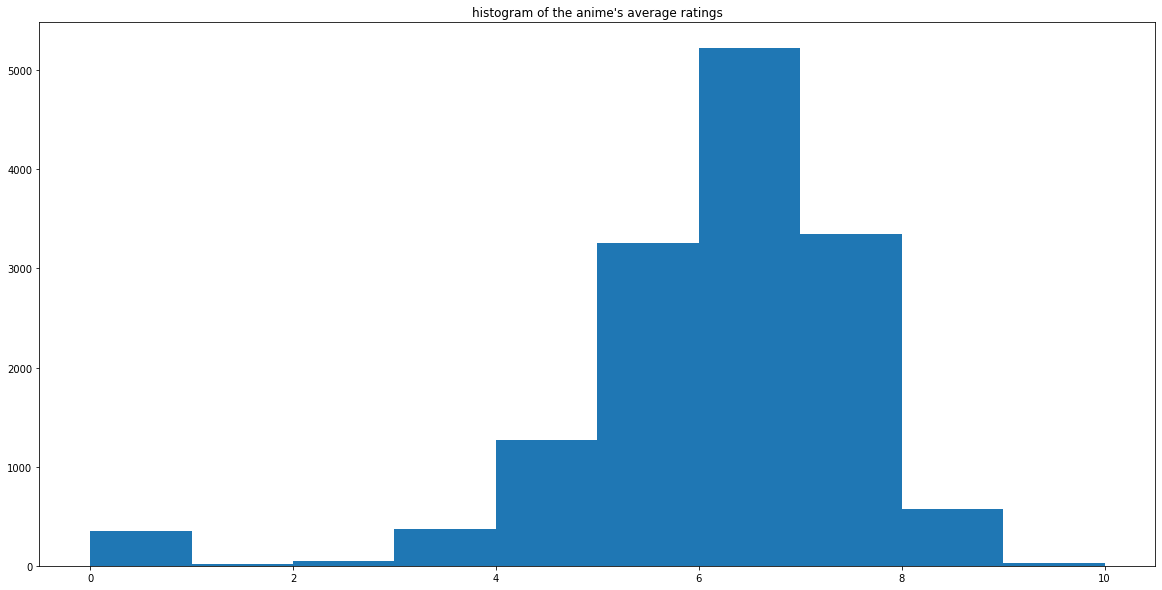

In [26]:
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(animedf.score)
ax.set_title("histogram of the anime's average ratings")

In [4]:
df

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,1362307973,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,1362923691,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,1367081015,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,1362308037,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,1364399953,NaN
...,...,...,...,...,...,...,...,...,...,...,...
80076107,mini_kaila,5940,4,0000-00-00,0000-00-00,8,1,0.0,0,1256326186,NaN
80076108,mini_kaila,6030,0,0000-00-00,0000-00-00,0,4,NaN,0,1254150549,NaN
80076109,mini_kaila,6500,1,0000-00-00,0000-00-00,8,3,0.0,0,1263503239,NaN
80076110,mini_kaila,7058,0,0000-00-00,0000-00-00,8,3,0.0,0,1272110959,NaN


In [ ]:
# df.my_last_updated.max() = 1526976068
# df.my_last_updated = pd.to_datetime(df.my_last_updated, unit = 's')
# df['username'].value_counts()
frequencies = df['username'].value_counts()

condition = frequencies<5   # you can define it however you want
mask_obs = frequencies[condition].index
mask_dict = dict.fromkeys(mask_obs, 'miscellaneous')

df['username'] = df['username'].replace(mask_dict) 

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(df['username'].dropna())

(array([9257004., 9143049., 9222267., 9218187., 8946635., 6809545.,
        6838481., 6911013., 6895588., 6834082.]),
 array([     0. ,  28304.3,  56608.6,  84912.9, 113217.2, 141521.5,
        169825.8, 198130.1, 226434.4, 254738.7, 283043. ]),
 <a list of 10 Patch objects>)

Error in callback <function flush_figures at 0x123071950> (for post_execute):


KeyboardInterrupt: 

In [16]:
df.describe()

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated
count,8.007611e+07,8.007611e+07,8.007611e+07,8.007611e+07,6.333426e+07,8.007611e+07,8.007611e+07
mean,1.196189e+04,1.396328e+01,4.338410e+00,3.035068e+00,7.239367e-04,7.406522e+00,1.383827e+09
std,1.143202e+04,3.391269e+02,3.933398e+00,1.746709e+00,2.689633e-02,1.110973e+04,1.401150e+08
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.762000e+03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.323886e+09
50%,8.476000e+03,3.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.404043e+09
75%,2.047900e+04,1.300000e+01,8.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.467512e+09
max,3.791600e+04,6.553500e+04,1.000000e+01,5.500000e+01,1.000000e+00,1.677722e+07,1.526976e+09


In [42]:
# df_clean.username.isnull().sum() = 261
print(f'the null count in username is {df_clean.username.isnull().sum()}')
print(f'the null count in anime_id is {df_clean.anime_id.isnull().sum()}')
print(f'the null count in my_watched_episodes is {df_clean.my_watched_episodes.isnull().sum()}')
print(f'the null count in my_score is {df_clean.my_score.isnull().sum()}')
print(f'the null count in my_status is {df_clean.my_status.isnull().sum()}')
print(f'the null count in my_rewatching is {df_clean.my_rewatching.isnull().sum()}')
print(f'the null count in my_last_updated is {df_clean.my_last_updated.isnull().sum()}')

the null count in username is 261
the null count in anime_id is 0
the null count in my_watched_episodes is 0
the null count in my_score is 0
the null count in my_status is 0
the null count in my_rewatching is 0
the null count in my_last_updated is 0


In [36]:
df_clean['my_rewatching']= df_clean['my_rewatching'].fillna(0)
df_clean['my_rewatching'].value_counts()

0.0    80030262
1.0       45850
Name: my_rewatching, dtype: int64

In [28]:
df2 = None

In [65]:
# df3.last_online.max() =  '2018-05-25 12:50:00'
# df3.last_online.min() = '2007-04-09 16:16:00'

'2007-04-09 16:16:00'

In [14]:
# uniques
# len(df.username.unique()) = 283045
# len(df.anime_id.unique()) = 14478

In [9]:
userlist = pd.read_csv('UserList.csv')

/Users/JamesSkelton/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/JamesSkelton/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 30922.,    191.,    123.,    260.,   1098.,   5370.,  30245.,
        107064.,  89968.,  37305.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

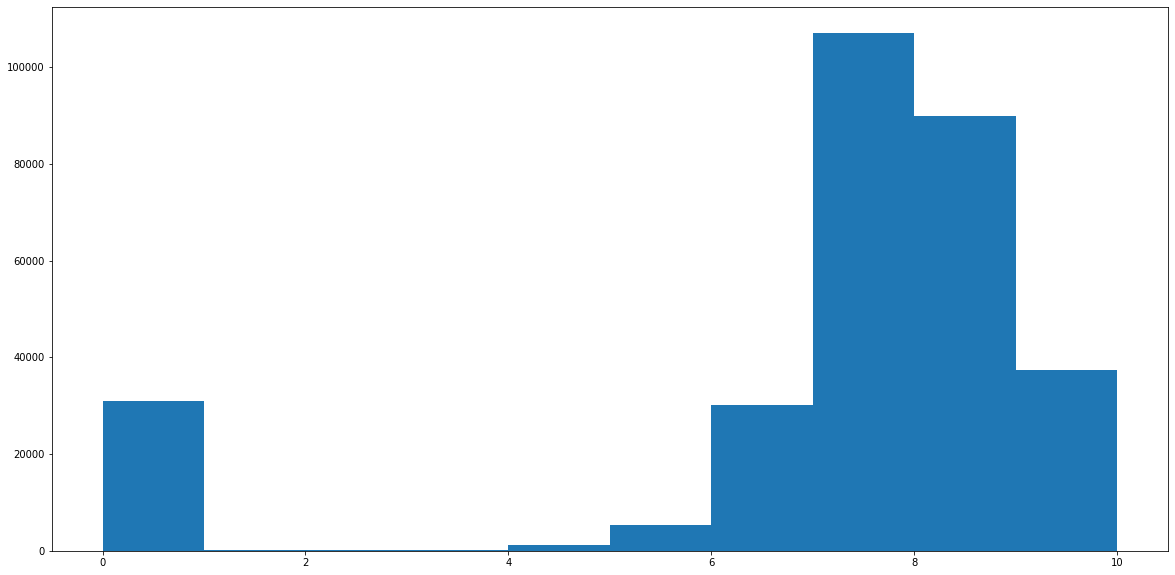

In [5]:
# userlist hist of mean score
fig, ax = plt.subplots(figsize = (20,10))
plt.hist(userlist.stats_mean_score)


In [8]:
# histogram showing counts of ratings by anime and counts of ratings by user ( how many times has each yse)


,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,shuzzable,2347781,36,72,16,2,25,35.48,NaN,NaN,NaN,NaN,2013-03-25,2015-09-09 21:54:00,9.06,7.0,2154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302670,ScruffyPuffy,3119025,0,27,0,0,0,7.92,NaN,NaN,NaN,NaN,2013-09-06,2014-10-10 09:04:00,0.00,0.0,477.0
302671,Torasori,3975907,22,239,0,4,176,86.88,Male,"Latvia, Riga",1998-11-18,NaN,2014-07-30,2018-05-24 21:34:46,8.98,47.0,5313.0
302672,onpc,1268417,5,169,2,5,24,38.36,Male,NaN,NaN,NaN,2012-04-23,2016-12-28 14:35:00,7.72,0.0,2280.0
302673,HMicca,1289601,11,73,2,2,16,119.97,Female,"Birmingham, England",1995-08-12,NaN,2012-05-05,2012-11-15 08:10:00,8.89,11.0,7049.0


In [10]:
df = scoresdf.merge(userlist, on = 'username')

In [33]:
df = df[['anime_id', 'user_id', 'my_watched_episodes', 'my_status', 'my_score', 'stats_mean_score', 'stats_episodes']]

In [34]:
# df = df[['anime_id', 'user_id', 'my_score', 'my_last_updated', 'stats_mean_score']]
# df = df[['anime_id', 'user_id', 'my_score', 'stats_mean_score', 'user_completed', 'user_watching']]
df = df[df['my_watched_episodes']>3]
df = df[df['stats_episodes']>3]
df = df[['anime_id', 'user_id', 'my_score', 'stats_mean_score']]
df

,anime_id,user_id,my_score,stats_mean_score
0,11013,2255153,8,7.43
1,2104,2255153,7,7.43
2,5262,2255153,7,7.43
3,721,2255153,7,7.43
4,12365,2255153,8,7.43
...,...,...,...,...
22691301,1629,336452,0,0.00
22691302,1835,110255,10,10.00
22691303,1728,290011,9,9.00
22691306,1110,223688,10,10.00


In [35]:
df.to_csv('final_dataset.csv')

In [36]:
df

,anime_id,user_id,my_score,stats_mean_score
0,11013,2255153,8,7.43
1,2104,2255153,7,7.43
2,5262,2255153,7,7.43
3,721,2255153,7,7.43
4,12365,2255153,8,7.43
...,...,...,...,...
22691301,1629,336452,0,0.00
22691302,1835,110255,10,10.00
22691303,1728,290011,9,9.00
22691306,1110,223688,10,10.00


In [13]:
print(anime.columns)
print(userlist.columns)

NameError: name 'anime' is not defined

In [ ]:
scoresdf = scoresdf.merge(anime, on = 'anime_id')
scoresdf = scoresdf.merge(userlist, on = 'username')
scoresdf = scoresdf[scoresdf['my_watched_episodes']>0]

scoresdf

In [11]:
# scoresdf = scoresdf[scoresdf['my_watched_episodes']>0]
scoresdf.to_csv('final_dataset.csv')

KeyboardInterrupt: 

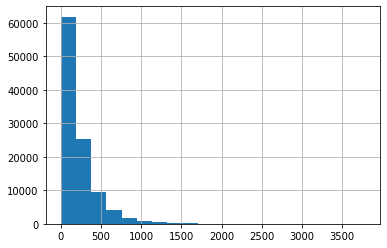

In [31]:
users['anime_id'].hist(bins =)

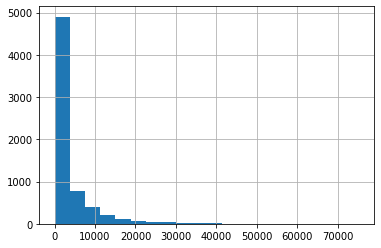

In [33]:
anime['user_id'].hist(bins =20)

In [3]:
import boto3

s3 = boto3.client('s3')

In [4]:
for b in s3.list_buckets()['Buckets']:
    print(b['Name'])

athos.very.first.aws.bucket
aws-logs-478334398153-us-east-2
myanimelist-recommender


In [39]:
userlist = pd.read_csv('final_anime_2.csv')
userlist

,Unnamed: 0,anime_id,username,my_score,user_id,stats_mean_score,my_watched_episodes,my_status
0,0,21,karthiga,9,2255153,7.43,586,1
1,1,59,karthiga,7,2255153,7.43,26,2
2,2,74,karthiga,7,2255153,7.43,26,2
3,3,120,karthiga,7,2255153,7.43,26,2
4,4,178,karthiga,7,2255153,7.43,26,2
...,...,...,...,...,...,...,...,...
21994561,22691303,15611,Yokonightcore,9,4862000,9.00,48,1
21994562,22691304,27815,Yokonightcore,9,4862000,9.00,22,1
21994563,22691305,5945,wargod,8,299167,8.00,39,2
21994564,22691306,1316,JMc_SetoKai_LoVe,9,263803,9.00,52,2


In [27]:
userlist.loc[userlist['username'] == 'Nyaaa-']


,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
18593,Nyaaa-,61503,136,361,0,2,766,115.58,Male,The Netherlands,1991-08-18,NaN,2008-05-18,2018-05-16 18:38:28,8.27,10.0,7039.0


In [3]:
file = pd.read_csv('final_anime.csv')

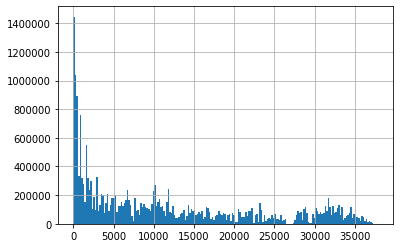

In [6]:
file['anime_id'].hist(bins =200)